# sigK regulon analysis of variation across mtb complex

## method:

* align samples to a reference sigK region e.g. MTB 
* call variants
* load all variants for comparison

## Links

* https://www.ncbi.nlm.nih.gov/nuccore/AL123456.3?report=graph
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2258859/
* [Mutations in Mycobacterium tuberculosis Rv0444c, the gene encoding anti‐SigK, explain high level expression of MPB70 and MPB83 in Mycobacterium bovis](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1365-2958.2006.05455.x)
* [Differential gene expression between Mycobacterium bovis and Mycobacterium tuberculosis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2080781/)


In [1]:
import os, glob, subprocess
from importlib import reload
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation
from BCBio import GFF
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from snpgenie import tools, aligners, app, trees, plotting

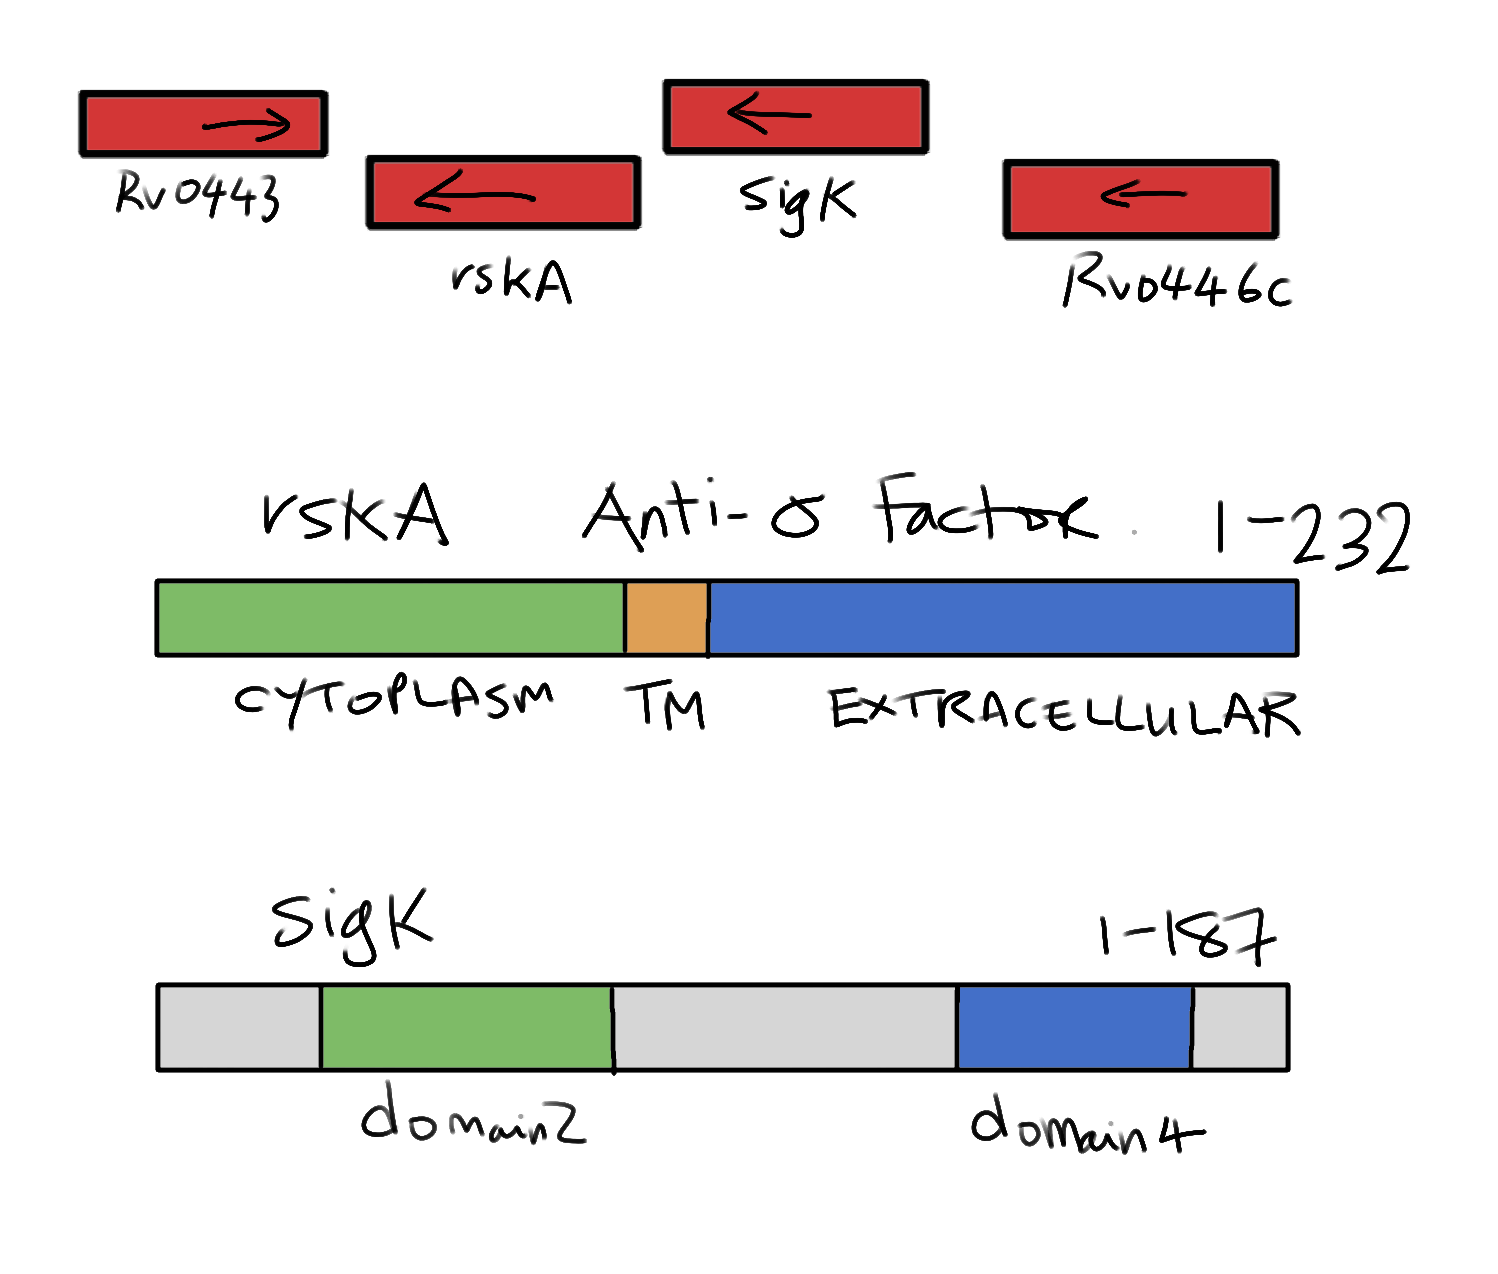

In [33]:
from IPython.display import Image
Image(filename = "diagram.png", width=500)

In [34]:
df=pd.read_csv('../genomes_data.csv')
path = '/storage/elena_data'
df[:5]

,ACCESSION,PAIRED,LINEAGE,ORIGIN,BIOPROJECT,BIOSAMPLE,Reads lenght (bp),LINK1,LINK2,REFERENCE
0,ERR2642516,no,M. caprae,NaN,PRJEB27266,\t\nSAMEA4732081,51,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR264/006/...,NaN,Brites et al. 2018
1,ERR551023,yes,M. caprae,Congo,PRJEB9545,SAMEA2533642,150,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR5...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR5...,Malm et al. 2017
2,ERR551704,yes,M. caprae,Germany,PRJEB9545,SAMEA2534133,150,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR5...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR5...,Malm et al. 2017
3,ERR552526,yes,M. caprae,Germany,PRJEB9545,SAMEA2534708,150,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR552/ERR5...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR552/ERR5...,Malm et al. 2017
4,ERR841382,no,M. caprae,NaN,PRJEB9003,SAMEA3318466,51,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR841/ERR8...,NaN,Domogalla et al. 2013


In [4]:
rec = list(SeqIO.parse('sigk_locus.gb',format='gb'))[0]
#rec.features

## run snpgenie against sigK locus sequence

In [ ]:
args = {'threads':12, 'outdir': 'snp_results', 'labelsep':'-',  
        'input':['/storage/elena_data/'],        
        'reference': 'sigk_locus.fa', 'gb_file':'sigk_locus.gb',
        'overwrite':False,
        'filters' : 'QUAL>=30 && FORMAT/DP>=30 && DP4>=4 && MQ>35'
        }
W = app.WorkFlow(**args)
st = W.setup()
W.run()

## snps

In [6]:
c = app.read_csq_file('snp_results/csq.tsv')
c=c[c.snp_type!='synonymous']
#c[c.gene=='rskA']
muts = list(c.aa.dropna().unique())
#muts

In [7]:
X=pd.read_csv('snp_results/csq.matrix')
X = X[X.aa.isin(muts)]
X=X.set_index(['gene','aa']).sort_index()

labelmap = dict(zip(df.ACCESSION,df.LINEAGE))
X=X.rename(columns=labelmap)
X.loc['rskA']

,M. canetti STB-A,M. tuberculosis L2,BCG,M. tuberculosis L5,M. canetti STB-K-S,M. canetti STB-K-R,M. tuberculosis L7,M. tuberculosis L7,M. tuberculosis L7,M. tuberculosis L7,...,M. caprae,M. caprae,M. canetii,M. bovis,M. bovis,BCG,M. bovis,M. caprae,M. canetti (NYS),WT_S18_L001
aa,,,,,,,,,,,,,,,,,,,,,
107G>107D,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
184G>184E,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
216T>216A,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220Q>220R,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233*>233S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41A>41V,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79K>79I,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81E>81D,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#plotting.plot_matrix(X,w=14,h=7)
sns.clustermap(X,row_cluster=False,cmap='gray_r')

## phylogeny using sigK locus

In [8]:
summ = pd.read_csv('snp_results/summary.csv')

In [31]:
trees.run_RAXML('snp_results/core.fa',outpath='temp')

raxmlHPC-PTHREADS -f a -N 10 -T 8 -m GTRCAT -V -p 32750624 -x 91511799 -n variants -w /home/damien/gitprojects/rd900/sigK_regulon/temp -s snp_results/core.fa


'/home/damien/gitprojects/rd900/sigK_regulon/temp/RAxML_bipartitions.variants'

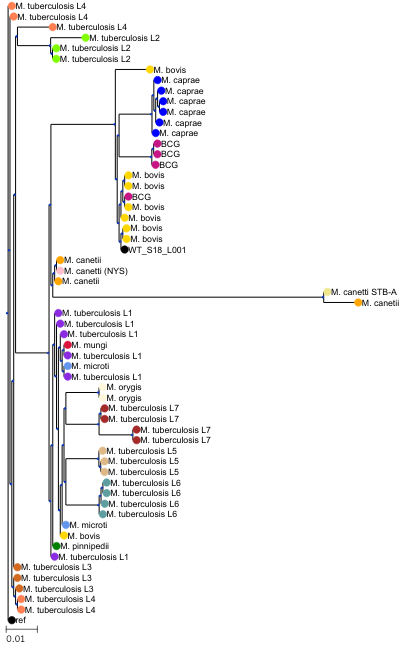

In [99]:
reload(trees)
colormap = trees.colors_from_labels(df,'ACCESSION','LINEAGE')
labelmap = dict(zip(df.ACCESSION,df.LINEAGE))
tree,ts = trees.create_tree('temp/RAxML_bestTree.variants',None,labelmap,colormap)
names=['M. canetti STB-K-S','M. canetti STB-K-R']
trees.remove_nodes(tree, names)

ts.scale = 5000
#ts.mode = 'c'
ts.margin_left = 10
ts.branch_vertical_margin = 1
#ts.force_topology = True
tree.render('%%inline',tree_style=ts,w=400)